# <center>Favio Conde</center>

### <center>D206 - Data Cleaning</center>

### <center>July 11, 2023</center>

### <center>WGU</center>

# Table of Contents

#### Part I: Research Question and Variables.........................................3
 
 A: Question or Decision........................................................................3

 B: Required Variables...........................................................................3
 
#### Part II: Data Cleaning Plan (Detection).............................................6
 
 C1: Plan to Assess Quality of Data......................................................6
 
 C2: Justification of Approach................................................................7
 
 C3: Justification of Tools.......................................................................7
 
 C4: Provide the Code...........................................................................7
 
#### Part III:  Data Cleaning (Treatment)..................................................17
 
 D1: Cleaning Findings........................................................................17

 D2: Justification  of Mitigation Methods...............................................18
 
 D3: Summary of the Outcomes..........................................................18
 
 D4: Mitigation Code............................................................................18
 
 D5: Clean Data...................................................................................21
 
 D6: Limitations....................................................................................21
 
 D7: Impact of Limitations....................................................................21
 
#### Part IV: PCA.......................................................................................21
 
 E1: Principal Components..................................................................21

 E2: Criteria Used................................................................................22
 
 E3: Benefits........................................................................................23
 
 F: Pinopto Video.................................................................................23
 
 G: Sourced of Third-Party Code.........................................................23
 
 H: Sources..........................................................................................24

## Part I: Research Question and Variables

### A: Question or Decision

What variables in the dataset have a correlations with the readmission of patients so that the hospital can better determine if readmission can be predicted?

### B: Required Variables

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data details table into Jupyter
table_df = pd.read_csv('C:/Users/Favio/Documents/Education/WGU/MSDA/D206/PA/Table.csv')
table_df

,Variable Name,Data Type,Description/Definition,Example
0,Unnamed,int64,Index ID created in Pandas,NaN
1,CaseOrder,int64,An ID created to preserve order of the data,1
2,Customer_id,object,Unique customer ID,C412403
3,Interaction,object,"Interaction ID unique to the customer, proced...",8cd49b13-f45a-4b47-a2bd-173ffa932c2f
4,UID,object,"Interaction ID unique to the customer, proced...",3a83ddb66e2ae73798bdf1d705dc0932
5,City,object,Patient city from billing statement,Eva
6,State,object,Patient state from billing statement,AL
7,County,object,Patient county from billing statement,Morgan
8,Zip,int64,Patient zip from billing statement,35621
9,Lat,float64,Patient latitude from residence on billing sta...,34.3496


## Part II: Data-Cleaning Plan (Detection)

### C1: Plan to Assess Quality of Data

To detect duplicates I used the ".duplicated()" function on the database.  To detect missing  values I used the a combination of ".isnull()" and ".sum()" which sums the number of null values in each column.  The detect outliers I used boxplots from Seaborn.  I did not re-express any categorical variables since I did not find any inconsistency across each individual variable.

### C2: Justification of Approach

I used the ".duplicated()" funciton because it is an easy method to quickly identify if there are any duplicated rows in the dataset.

The method ".isnull()" returns a True for each cell in the table if the value is null, and False if there is a value in the cell.  Combining the ".sum()" method to the ".isnull()" method adds each value of True and False across columns.  I used this method because it is a quick and efficient way to identify if there are any null values in each column.

To identify outliers, I used the Seaborn package, specifically boxplot charts to create boxplots for all quantitative variables.  Boxplots create a visual chart that makes it easy to identify if there are any outliers present in the variable data.

### C3: Justification of Tools

I used Python as the programming language since it has a broader application to data and I have some, albeit little, experience using Python.

I used the Numpy and Pandas library packages which make working with data in tabular form more efficient.  Using tabular form for the data allowed me to better organize and analyze the dataset.  These packages also provide easy functions to obtain pertinent information about the dataset.  I used the Seaborn package to create boxplots for quantitative variables to determine if outliers exist in the data.

### C4: Provide the Code

In [3]:
# Importing medical_raw_data.csv file into Jupyter
df = pd.read_csv('C:/Users/Favio/Documents/Education/WGU/MSDA/D206/PA/Files/medical_raw_data.csv')

# Viewing head to make sure import was successful
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Checking value types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [5]:
# Checking shape of df
df.shape

(10000, 53)

In [6]:
# Checking statistical description of df
cat = ['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']
df[cat].describe().T

,count,mean,std,min,25%,50%,75%,max
Children,7412.0,2.098219,2.155427,0.000000,0.000000,1.000000,3.000000,10.000000
Age,7586.0,53.295676,20.659182,18.000000,35.000000,53.000000,71.000000,89.000000
Income,7536.0,40484.438268,28664.861050,154.080000,19450.792500,33942.280000,54075.235000,207249.130000
Overweight,9018.0,0.709137,0.454186,0.000000,0.000000,1.000000,1.000000,1.000000
Anxiety,9016.0,0.322316,0.467389,0.000000,0.000000,0.000000,1.000000,1.000000
Initial_days,8944.0,34.432082,26.287050,1.001981,7.911709,34.446941,61.124654,71.981486


In [7]:
# Checking for duplicates
df.duplicated().value_counts()

# All 10,000 entries are false which confirms no duplicates

False    10000
dtype: int64

In [8]:
# Checking for missing values
df.isnull().sum()

# Found nulls in 'Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', and 'Initial_days'

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

<b>Checking for outliers in all quantitative variables using boxplots</b>

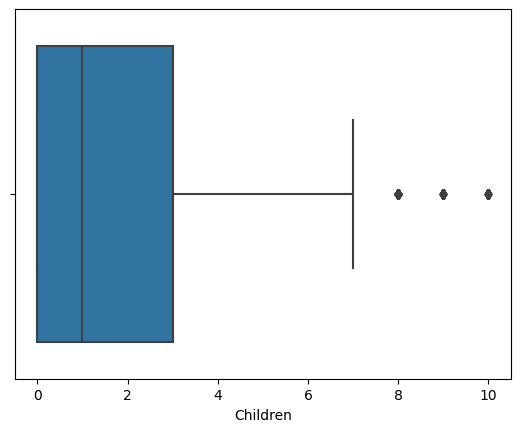

In [9]:
sns.boxplot(data=df, x='Children');

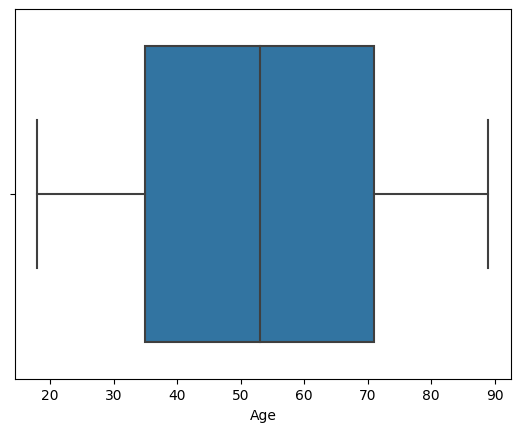

In [10]:
sns.boxplot(data=df, x='Age');

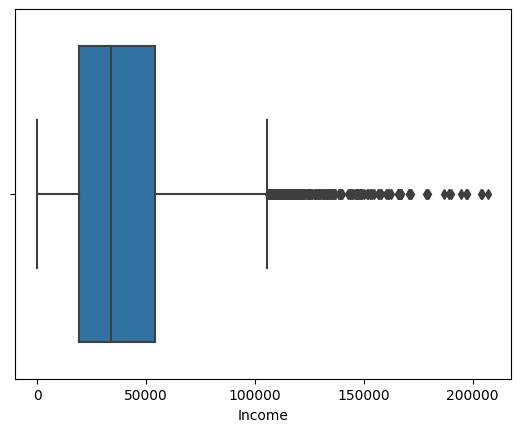

In [11]:
sns.boxplot(data=df, x='Income');

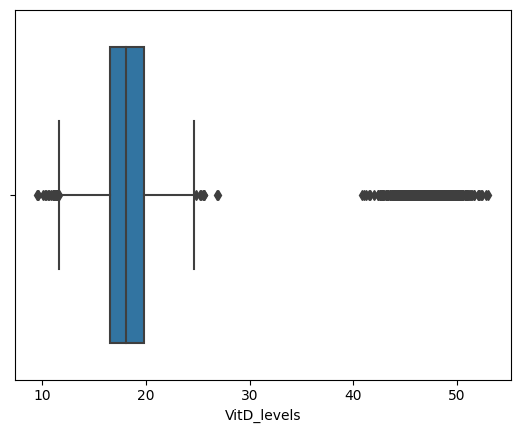

In [12]:
sns.boxplot(data=df, x='VitD_levels');

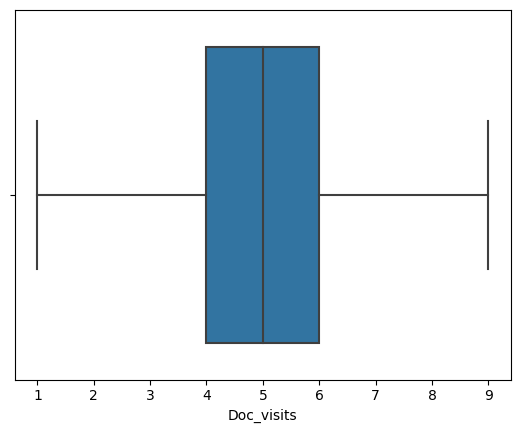

In [13]:
sns.boxplot(data=df, x='Doc_visits');

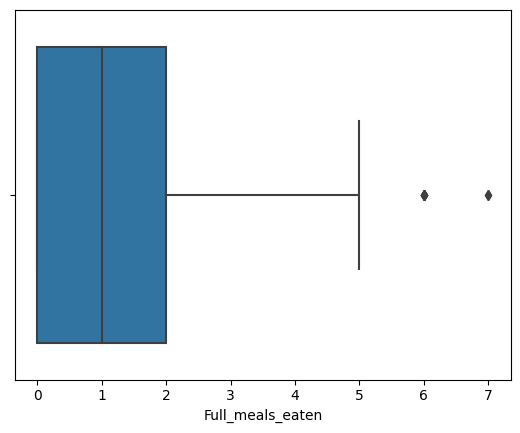

In [14]:
sns.boxplot(data=df, x='Full_meals_eaten');

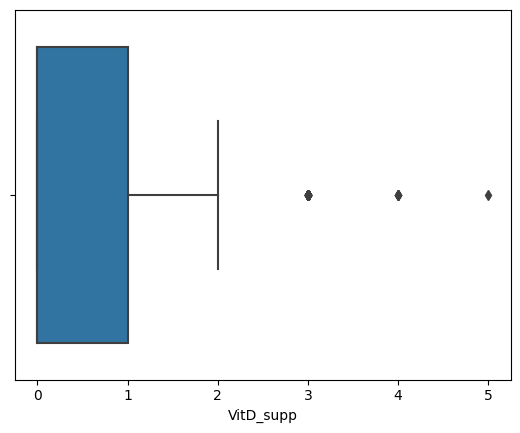

In [15]:
sns.boxplot(data=df, x='VitD_supp');

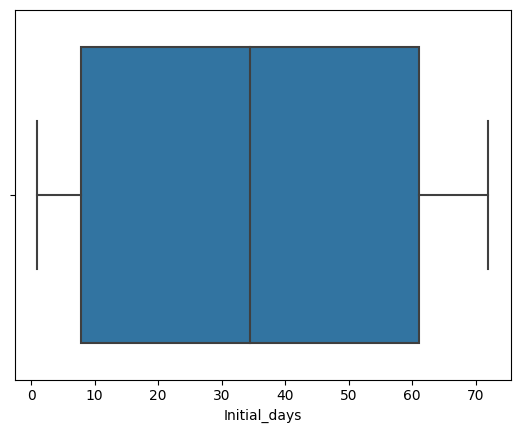

In [16]:
sns.boxplot(data=df, x='Initial_days');

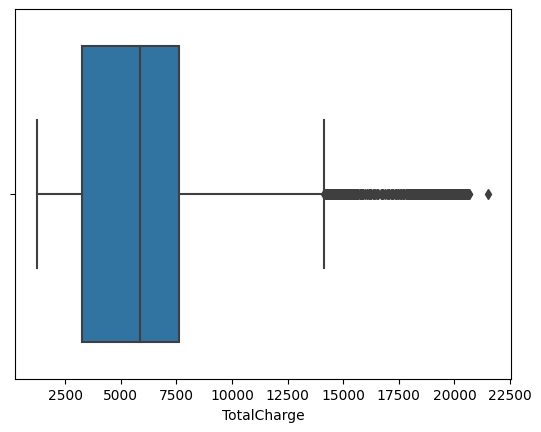

In [17]:
sns.boxplot(data=df, x='TotalCharge');

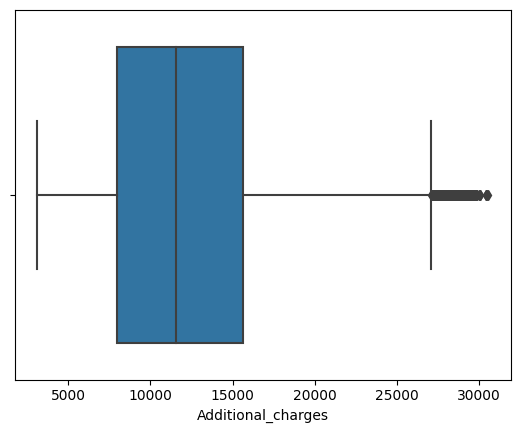

In [18]:
sns.boxplot(data=df, x='Additional_charges');

## Part III: Data Cleaning (Treatment)

### D1: Cleaning Findings

No duplicates were found in the dataset.

I found nulls in columns 'Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', and 'Initial_days'.

The number of null values are for each column is:

*   'Children': 2,588
*   'Age': 2,414
*   'Income': 2,464
*   'Soft_drink': 2,467
*   'Overweight': 982
*   'Anxiety': 984
*   'Initial_days': 1,056

I observed outliers in the quantitative variables 'Children', 'Income', 'VitD_levels', 'Full_meals_eaten', 'VitD_supp', and 'Additional_charges'.  There were 3 outlies in 'Children', 2 in 'Full_meats_eaten', 3 in 'VitD_supp', and many outliers in the rest identified in the previous sentence.  All outliers observed were greater than the fourth quartile, with the exception of 'VitD_supp' which had outliers at both extremes.

### D2: Justification of Mitigation Methods

Since there were no duplicates found, no treatment was needed for duplicated rows.

To treat missing values, I used the mode to treat qualitative variables, and the median to treat most of the quantitative variables.  I chose the median since the  mean is affected by outliers, and some of the variables have a lot of outliers.  For 'Initial_days' I used the mean to impute tha values of Nan since the data follows a normal distribution.

I did not treat the outliers since they appear to be legitimate observations.  For example, it's reasonable that there are some patients that have more  children than others, or more income.

### D3: Summary of the Outcomes

I did not treat duplicates or outliers, so no process was performed on these.

To treat missing values, I imputed the value using median for 'Children', 'Age', 'Income'; mean for 'Initial_days'; and mode for 'Soft_drink', 'Overweight', and 'Anxiety'.

I reviewed the mean before and after the imputation of missing values and although the values changed, it was not by much.

### D4: Mitigation Code

For the code used to impute missing values, I used Dr. Middleton's recording on <i>Welcome to Webinar 2: Getting Started with Missing Data and Outliers</i>.

In [19]:
# Treating missing values for 'Children'
df['Children'].fillna(df['Children'].median(), inplace=True)

In [20]:
# Treating missing values for 'Age'
df['Age'].fillna(df['Age'].median(), inplace=True)

In [21]:
# Treating missing values for 'Income'
df['Income'].fillna(df['Income'].median(), inplace=True)

In [22]:
# Treating missing values for 'Soft_drink'
df['Soft_drink'] = df['Soft_drink'].fillna(df['Soft_drink'].mode()[0])

In [23]:
# Treating missing values for 'Overweight'
df['Overweight'] = df['Overweight'].fillna(df['Overweight'].mode()[0])

In [24]:
# Treating missing values for 'Anxiety'
df['Anxiety'] = df['Anxiety'].fillna(df['Anxiety'].mode()[0])

In [25]:
# Treating missing values for 'Initial_days'
df['Initial_days'].fillna(df['Initial_days'].mean(), inplace=True)

In [26]:
# Verify all null values have been replaced
df.isnull().sum()

Unnamed: 0            0
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services        

In [27]:
# Checking data after imputing null values
cat = ['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']
df[cat].describe().T

,count,mean,std,min,25%,50%,75%,max
Children,10000.0,1.814000,1.916969,0.000000,1.000000,1.000000,3.000000,10.000000
Age,10000.0,53.224300,17.993820,18.000000,41.000000,53.000000,65.000000,89.000000
Income,10000.0,38872.450471,25042.796229,154.080000,23956.162500,33942.280000,46466.797500,207249.130000
Overweight,10000.0,0.737700,0.439907,0.000000,0.000000,1.000000,1.000000,1.000000
Anxiety,10000.0,0.290600,0.454062,0.000000,0.000000,0.000000,1.000000,1.000000
Initial_days,10000.0,34.432082,24.860232,1.001981,8.928987,34.432082,59.459981,71.981486


### D5: Clean Data

In [28]:
# Extracting cleaned dataset to CSV file
df.to_csv(r'C:/Users/Favio/Documents/Education/WGU/MSDA/D206/PA/Files/medical_raw_data_cleaned.csv')

### D6: Limitations

By using the mean, median, mode for replacing null values, this could alter the distribution of the data which could result in distortion of the data distribution.

I did not delete or impute and duplicates or outliers.

### D7: Impact of Limitations

If a data analyst were to use the resulting cleaned data then they could potentially be using data that has had the distribution altered which would impact the analysis or conclusions.  For example, the alteration could result in grouping of readmissions to change which could affect the results of the research question of whether the number of doctor visits affects the readmission.

## Part IV: PCA

### E1: Principal Components

To perform the PCA analysis, I used code from the textbook (Larose, 2019, pp.179-181).

In [29]:
# Importing scikit-learn
from sklearn.decomposition import PCA

In [30]:
var_pca = df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']]
var_pca_normalized = (var_pca - var_pca.mean())/var_pca.std()

In [31]:
pca = PCA(n_components = var_pca.shape[1])
pca.fit(var_pca_normalized)

PCA(n_components=10)

In [32]:
var_pca2 = pd.DataFrame(pca.transform(var_pca_normalized), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [33]:
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index = var_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Children,0.004161,0.011653,-0.140700,-0.053314,0.888748,-0.176011,-0.386726,0.081893,-0.009249,-0.002507
Age,0.083659,0.701029,-0.018053,-0.024308,-0.014232,-0.009142,0.015073,-0.025170,-0.706561,-0.016344
Income,-0.006810,-0.005130,-0.210452,0.623599,0.301187,0.301507,0.456470,-0.420384,-0.007202,-0.001113
VitD_levels,0.540622,-0.054029,0.337776,0.259324,-0.064129,0.149692,-0.410642,-0.178038,-0.022797,0.544154
Doc_visits,-0.005532,0.013320,-0.115823,0.626569,-0.171964,-0.683260,-0.063284,0.305501,-0.005960,-0.000244
Full_meals_eaten,-0.008645,0.035522,0.593182,0.151575,0.237558,0.230523,0.339286,0.631702,-0.009151,-0.001409
VitD_supp,0.033754,0.010998,-0.557296,0.176512,-0.146986,0.544206,-0.300591,0.498854,-0.005154,-0.001496
Initial_days,0.446241,-0.073694,-0.381016,-0.306092,0.086502,-0.198260,0.513373,0.206486,-0.006032,0.451174
TotalCharge,0.702280,-0.079334,0.017672,0.002976,0.002431,-0.012461,0.012105,-0.007379,0.020865,-0.706676
Additional_charges,0.084223,0.701564,-0.012273,-0.004447,-0.000376,-0.003674,0.007105,-0.017745,0.706751,0.025851


### E2: Criteria Used

Based on the Kaiser Rule and the use of scree plots, PC1, PC2, PC3 and PC4 should be kept since they have an eigenvalue greater or equal to 1 (Middleton, 2022).

In [34]:
cov_matrix = np.dot(var_pca_normalized.T, var_pca_normalized) / var_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T,  np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

In [36]:
var_pca.shape[0]

10000

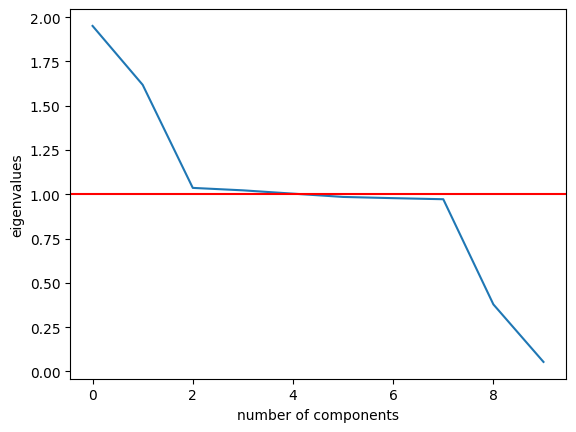

In [35]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y = 1, color = 'red')
plt.show()

### E3: Benefits

Organizations can  benefit  from the results of using PCA to by reducing the variables that are being analyzed through grouping components into principal components for a more efficient analysis.  If the analyst can reduce the number of variables  being assessed, then the analyst time could be shortened.

### F: Provide a Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=67054405-3728-4299-be29-b03c0177efd9

### G: Third-Party Code References

Larose, C. D., & Larose, D. T. (2019). <i>Data Science Using Python and R. Wiley Blackwell<i>.
    
Middleton, Dr. Keiona (2022). <i>D206 - Webinar 2: Getting Started with Missing Data and Outliers - October (2022)<i> [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d3af9533-0b7f-4d42-9db2-af48002f4799

Middleton, Dr. Keiona (2022). <i>D206 - Webinar 4: Getting Started with PCA - November (2022)<i> [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7b31791b-24e8-4077-ba1a-af5d0005144c

### H: References

Larose, C. D., & Larose, D. T. (2019). <i>Data Science Using Python and R. Wiley Blackwell<i>. 